# KNN: K-Nearest Neighbors

En este notebooks, vamos a implementar el algoritmo de clasificación de K vecinos más cercanos usando la libreria Scikit-learn. Además, vamos a evaluar los resultados obtenidos para distintos valores del hiperparámetro k (número de vecinos).

## 1. Clasificación en el dataset IRIS

Para comenzar, vamos a trabajar con un dataset que ya conocemos, el de IRIS.

### 1.1 Cargar el dataset

Primero cargamos las librerias y el dataset que vamos a usar (el cual en este caso lo traemos desde la libreria Seaborn). Separamos el dataset entre features, `X`, y labels `y`. 

In [1]:
import pandas as pd
import seaborn as sns
import numpy as np


league = pd.read_csv('champions-stats.csv')
# X = league.drop("name", axis=1)
# y = league.name

In [2]:
data = [['fighter'], ['mage'], ['assasin'], ['tank'], ['tank'], ['mage'],
       ['mage'], ['marksman'], ['mage'], ['mage'], ['mage'], ['tank'],
       ['mage'], ['tank'], ['marksman'], ['fighter'], ['mage'], ['tank'],
       ['marksman'], ['tank'], ['assasin'], ['tank'], ['marksman'], ['assasin'],
       ['assasin'], ['assasin'], ['marksman'], ['mage'], ['fighter'], ['assasin'],
       ['mage'], ['fighter'], ['tank'], ['tank'], ['mage'], ['marksman'],
       ['fighter'], ['mage'], ['fighter'], ['fighter'], ['mage'], ['mage'],
       ['fighter'], ['fighter'], ['fighter'], ['marksman'], ['marksman'], ['fighter'],
       ['marksman'], ['mage'], ['mage'], ['assasin'], ['assasin'], ['mage'],
       ['fighter'], ['mage'], ['fighter'], ['marksman'], ['fighter'], ['marksman'],
       ['assasin'], ['fighter'], ['tank'], ['mage'], ['marksman'], ['mage'],
       ['mage'], ['tank'], ['mage'], ['tank'], ['fighter'], ['marksman'],
       ['mage'], ['mage'], ['mage'], ['tank'], ['tank'], ['mage'],
       ['mage'], ['assasin'], ['tank'], ['fighter'], ['mage'], ['tank'],
       ['fighter'], ['tank'], ['assasin'], ['assasin'], ['marksman'], ['mage'],
       ['tank'], ['fighter'], ['fighter'], ['assasin'], ['fighter'], ['mage'],
       ['mage'], ['tank'], ['marksman'], ['assasin'], ['tank'], ['fighter'],
       ['tank'], ['tank'], ['marksman'], ['tank'], ['mage'], ['mage'],
       ['mage'], ['mage'], ['mage'], ['tank'], ['mage'], ['assasin'],
       ['tank'], ['marksman'], ['tank'], ['marksman'], ['fighter'], ['fighter'],
       ['mage'], ['marksman'], ['fighter'], ['tank'], ['marksman'], ['marksman'],
       ['mage'], ['mage'], ['fighter'], ['mage'], ['mage'], ['tank'],
       ['fighter'], ['fighter'], ['marksman'], ['mage'], ['fighter'], ['fighter'],
       ['fighter'], ['mage'], ['tank'], ['assasin'], ['mage'], ['mage'],
       ['mage'], ['mage']]

clase = pd.DataFrame(data, columns = ['clase'])
league = pd.concat([league, clase], axis=1)
X = league.drop(["clase", 'name', 'mp+', 'hp5+', 'mp5+','ar+','mr+'], axis=1)
y = league.clase
league.head(5)

,name,hp,hp+,hp5,hp5+,mp,mp+,mp5,mp5+,ad,ad+,as,as+,ar,ar+,mr,mr+,ms,rng,clase
0,Aatrox,580.00,90.0,3.0,1.00,0.0,0.0,0.000,0.000,60.0000,5.00,0.651,2.500,38.00,3.25,32.1,1.25,345.0,175.0,fighter
1,Ahri,526.00,92.0,6.5,0.60,418.0,25.0,8.000,0.800,53.0400,3.00,0.668,2.000,20.88,3.50,30.0,0.50,330.0,550.0,mage
2,Akali,575.00,95.0,8.0,0.50,200.0,0.0,50.000,0.000,62.4000,3.30,0.625,3.200,23.00,3.50,37.0,1.25,345.0,125.0,assasin
3,Alistar,573.36,106.0,8.5,0.85,350.0,40.0,8.500,0.800,61.1116,3.62,0.625,2.125,44.00,3.50,32.1,1.25,330.0,125.0,tank
4,Amumu,613.12,84.0,9.0,0.85,287.2,40.0,7.382,0.525,53.3800,3.80,0.638,2.180,33.00,3.80,32.1,1.25,335.0,125.0,tank


In [3]:
# league['as+'].describe()
wea = np.round(np.random.uniform(1.000, 6.000), 2)
wea

2.41

Luego, como aprendimos la clase anterior, vamos a separar el dataset en conjuntos de entrenamiento `X_train, y_train` y de testeo `X_test,y_test` usando la función `train_test_split` de scikit-learn (¡recordar importarla primero!). Esto lo hacemos para separar parte de los datos `X_test,y_test` con los cuales **no vamos a entrenar el dataset, y vamos a usarlos únicamente para evaluar el resultado de nuestro algoritmo**.

**Ejercicio**: Separar los instancias del Dataset, tomando en las variables `X_train, y_train` un 90% para entrenamiento y en las variables `X_test,y_test` un 10% para evaluación:

In [4]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, stratify=y, random_state=42)

### 1.2 Preprocesamiento de Datos

Antes de implementar un algoritmo de KNN, es muy importante normalizar los datos. Veamos algunos estadisticos de los distintos Features de nuestro Dataset:

In [5]:
print('Maximos: \n',X_train.max(),'\n \n Mínimas: \n',X_train.min(),'\n')
print('Means: \n',X_train.mean(),'\n \n Std: \n',X_train.std())

Maximos: 
 hp     616.280
hp+    112.000
hp5     10.000
mp     500.000
mp5     50.000
ad      70.000
ad+      5.000
as       0.694
as+      6.000
ar      47.000
mr      39.000
ms     355.000
rng    650.000
dtype: float64 
 
 Mínimas: 
 hp     400.00
hp+     60.00
hp5      2.50
mp       0.00
mp5      0.00
ad      45.66
ad+      0.00
as       0.20
as+      1.00
ar      18.00
mr      25.00
ms     325.00
rng    125.00
dtype: float64 

Means: 
 hp     555.278824
hp+     88.784314
hp5      6.730392
mp     314.227647
mp5      9.119520
ad      59.653093
ad+      3.206682
as       0.634127
as+      2.527667
ar      29.883647
mr      31.172549
ms     336.813725
rng    322.794118
dtype: float64 
 
 Std: 
 hp      34.381535
hp+      6.692137
hp5      1.793376
mp     104.258181
mp5      9.649627
ad       5.754202
ad+      0.601529
as       0.050868
as+      0.842765
ar       6.587750
mr       1.597099
ms       7.636196
rng    195.750110
dtype: float64


Como se puede observar, los features poseen diferentes escalas (la media de la variables *sepal_length* es 5 veces la media de la variable *petal_width*). Pasemos entonces a normalizar estos datos.

**Ejercicio**: Normalizar los features del Dataset utilizando la función `StandardScaler` (que deben importar desde `sklearn.preprocessing`):

In [6]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaler.fit(X_train)
X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)  


Volvamos a analizar los mismos estadísticos luego de la transformación:

In [7]:
print('Maximos: \n',pd.DataFrame(X_train).max(),'\n \n Mínimas: \n',pd.DataFrame(X_train).min(),'\n')
print('Means: \n',pd.DataFrame(X_train).mean(),'\n \n Std: \n',pd.DataFrame(X_train).std())

Maximos: 
 0     1.783004
1     3.486230
2     1.832162
3     1.790648
4     4.257404
5     1.807028
6     2.995988
7     1.182838
8     4.140512
9     2.611040
10    4.925247
11    2.393349
12    1.679804
dtype: float64 
 
 Mínimas: 
 0    -4.538647
1    -4.322455
2    -2.370548
3    -3.028821
4    -0.949731
5    -2.443813
6    -5.357211
7    -8.576596
8    -1.821635
9    -1.812809
10   -3.883937
11   -1.554709
12   -1.015432
dtype: float64 

Means: 
 0     7.455910e-16
1     4.168779e-16
2    -4.027280e-17
3    -1.749690e-16
4    -8.625998e-17
5     4.419123e-16
6    -8.606950e-16
7     1.458528e-16
8    -1.153761e-16
9    -2.394599e-16
10    7.183796e-16
11    1.044916e-16
12   -6.095342e-17
dtype: float64 
 
 Std: 
 0     1.004938
1     1.004938
2     1.004938
3     1.004938
4     1.004938
5     1.004938
6     1.004938
7     1.004938
8     1.004938
9     1.004938
10    1.004938
11    1.004938
12    1.004938
dtype: float64


**Para pensar**:
1. ¿Por qué será que es tan importante normalizar los datos en el caso de usar un algoritmo de KNN?
2. Analizar los resultados de los estadísticos (Max, Min, Media y Std) después de usar la función `StandardScaler` y discutir si presentan los valores esperados.

### 1.3 Implementar el clasificador KNN 
Vamos a importar la clase del modelo KNN desde scikit-learn usando la siguiente linea: `from sklearn.neighbors import KNeighborsClassifier`. 

Cuando creamos un objeto de esta clase, podemos definir el valor de algunos atributos del modelo. Estos atributos son los **hiperparámetros** que queremos utilizar. En el caso de este modelo, estos atributos van a ser la métria de la distancia (que por default es la euclideana) y, el más importante, el número de vecinos `k`. Vamos a cargar el modelo utilizando `k=2` vecinos.

In [8]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier

n_neighbors = 2
clf = KNeighborsClassifier(n_neighbors =n_neighbors )
tree = DecisionTreeClassifier(max_depth=2)

Ya estamos en condiciones de entrenar el modelo. 

**Ejercicio**: Entrenar el modelo con el set de entrenamiento y predecir las etiquetas tanto sobre el set de entrenamiento (train) como en el set de test.

In [9]:
clf.fit(X_train,y_train)
tree.fit(X_train,y_train)

y_train_pred = clf.predict(X_train)
y_test_pred = clf.predict(X_test)
y_train_pred_t = tree.predict(X_train)
y_test_pred_t = tree.predict(X_test)

print(y_test_pred)

['marksman' 'mage' 'fighter' 'mage' 'fighter' 'mage' 'fighter' 'mage'
 'marksman' 'mage' 'marksman' 'fighter' 'fighter' 'mage' 'fighter' 'mage'
 'tank' 'fighter' 'fighter' 'mage' 'fighter' 'assasin' 'mage' 'mage'
 'assasin' 'mage' 'mage' 'assasin' 'fighter' 'fighter' 'fighter' 'tank'
 'marksman' 'mage' 'mage' 'mage' 'mage' 'fighter' 'mage' 'assasin'
 'fighter' 'tank' 'mage' 'fighter']


Para evaluar el porcentaje de aciertos en la predicción de las etiquetas, vamos a utilizar la función `accuracy_score` que importamos desde `sklearn.metrics`

In [10]:
from sklearn.metrics import accuracy_score

In [11]:
train_acc = accuracy_score(y_train, y_train_pred)
test_acc = accuracy_score(y_test, y_test_pred)

print('Porcentaje de aceirtos sobre el set de entrenamiento:', train_acc)
print('Porcentaje de aceirtos sobre el set de evaluación:',test_acc)

train_acc_t = accuracy_score(y_train, y_train_pred_t)
test_acc_t = accuracy_score(y_test, y_test_pred_t)

print('Porcentaje de aceirtos tree sobre el set de entrenamiento:', train_acc_t)
print('Porcentaje de aceirtos tree sobre el set de evaluación:',test_acc_t)

Porcentaje de aceirtos sobre el set de entrenamiento: 0.7450980392156863
Porcentaje de aceirtos sobre el set de evaluación: 0.6136363636363636
Porcentaje de aceirtos tree sobre el set de entrenamiento: 0.7254901960784313
Porcentaje de aceirtos tree sobre el set de evaluación: 0.6363636363636364


**Ejercicios**:

1. ¿Son estos valores de accuracy que obtuvieron satisfactorios?
2. ¿Será el parámetro de `k=2` el mejor para elegir en nuestro modelo?¿Cómo podríamos saberlo?


### 1.4 Encontrar el mejor hiperparámetro

Para esto, debemos evaluar el accuracy del modelo en el set de evaluación para distintos valores del parámetro `k`. Vamos entonces a repetir el esquema de: **definir, entrenar y predecir** en un loop `for` que recorre una lista con distintos valores de `k`.

**Ejercicio**: Trabajar en el siguiente bloque de codigo, de manera de completar con valores las listas `lista_accuracy_train` y `lista_accuracy_test`.

In [12]:
# Definimos las listas vacias para los valores de accuracy deseados
lista_accuracy_train = []
lista_accuracy_test = []

# Definimos la lista de valores de k que vamos a explorar
k_vecinos = [1,2,3,4,5,6,7,8,9,10,15,20]

# Generamos en loop sobre los distintos valores de k 
for k in k_vecinos:
    
    # Vamos a repetir el siguiente bloque de código
    
    # Definir el modelo con el valor de vecinos deseado
    clf = KNeighborsClassifier(n_neighbors=k)
    
    # Entrenar el modelo
    clf.fit(X_train,y_train)
    
    # Predecir y evaluar sobre el set de entrenamiento
    y_train_pred = clf.predict(X_train)
    train_acc = accuracy_score(y_train, y_train_pred)
    
    # Predecir y evaluar sobre el set de evaluación
    y_test_pred = clf.predict(X_test)
    test_acc = accuracy_score(y_test, y_test_pred)
    
    # Agregar la información a las listas
    lista_accuracy_train.append(train_acc)
    lista_accuracy_test.append(test_acc)

**Ejercicio**: Realizar un gráfico que muestre la curvas de accuracy en el set de entrenamiento (`lista_accuracy_train`) y accuracy en el set de entrenamiento (`lista_accuracy_test`) en función del numero de vecinos (`k_vecinos`).

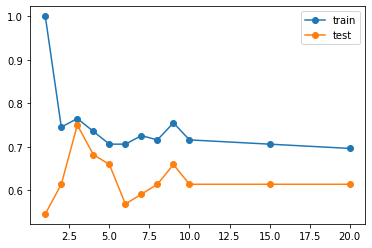

In [13]:
import matplotlib.pyplot as plt

plt.plot(k_vecinos,lista_accuracy_train,'o-',label='train' )
plt.plot(k_vecinos,lista_accuracy_test,'o-',label='test')
plt.legend()

**Para pensar**:
1. Analice los resultados de las curvas obtenidas. ¿Les parecen razonables?
2. Para el caso de `k = 1`, donde la performance en el set de entrenamiento es mucho mayor a la performance en en set de test. ¿En que tipo de régimen diría que se encuentra el modelo? ¿Por qué?
3. ¿Qué valor de `k` eligiría? ¿Por qué?

El siguiente bloque de codigo produce gráficos de la frontera de decisión para un clasificador KNN entrenado en el IRIS dataset utilizando distintos valores del hiperparámetro k. Con el fin de poder graficar los resultados, utilizamos sólo dos Features. 

No hace falta que modifique el código, sólo analice los gráficos producidos y vuelva a pensar las tres preguntas anteriores en términos de Underfitting y Overfitting.

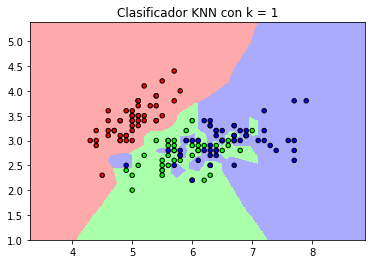

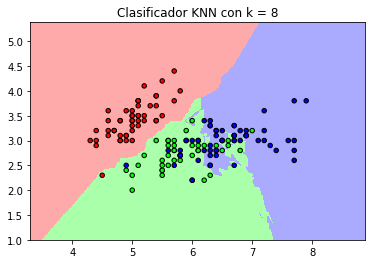

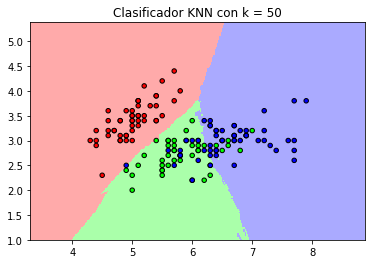

In [14]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap
from sklearn import neighbors, datasets

iris = datasets.load_iris()
X = iris.data[:, :2]
y = iris.target
h = .02  # step size in the mesh

# Create color maps
cmap_light = ListedColormap(['#FFAAAA', '#AAFFAA', '#AAAAFF'])
cmap_bold = ListedColormap(['#FF0000', '#00FF00', '#0000FF'])

for k in [1,8,50]:
    
    # we create an instance of Neighbours Classifier and fit the data.
    clf = neighbors.KNeighborsClassifier(n_neighbors=k)
    clf.fit(X, y)

    # Plot the decision boundary. For that, we will assign a color to each
    # point in the mesh [x_min, x_max]x[y_min, y_max].
    x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                         np.arange(y_min, y_max, h))
    Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])

    # Put the result into a color plot
    Z = Z.reshape(xx.shape)
    plt.figure()
    plt.pcolormesh(xx, yy, Z, cmap=cmap_light)

    # Plot also the training points
    plt.scatter(X[:, 0], X[:, 1], c=y, cmap=cmap_bold,
                edgecolor='k', s=20)
    
    plt.xlim(xx.min(), xx.max())
    plt.ylim(yy.min(), yy.max())
    plt.title("Clasificador KNN con k = %i"% (k))